In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.pyplot import figure

from scipy import stats
from numpy import mean
from scipy.stats import ttest_rel

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

#measurement class
Measurement = Base.classes.measurement

#station class
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#use inspector to get table structure
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()
print(tables)

# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

['measurement', 'station']
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#view the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
# Perform a query to retrieve the date and precipitation scores
# Calculate the date 1 year ago from the last data point in the database
last_year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
last_year_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

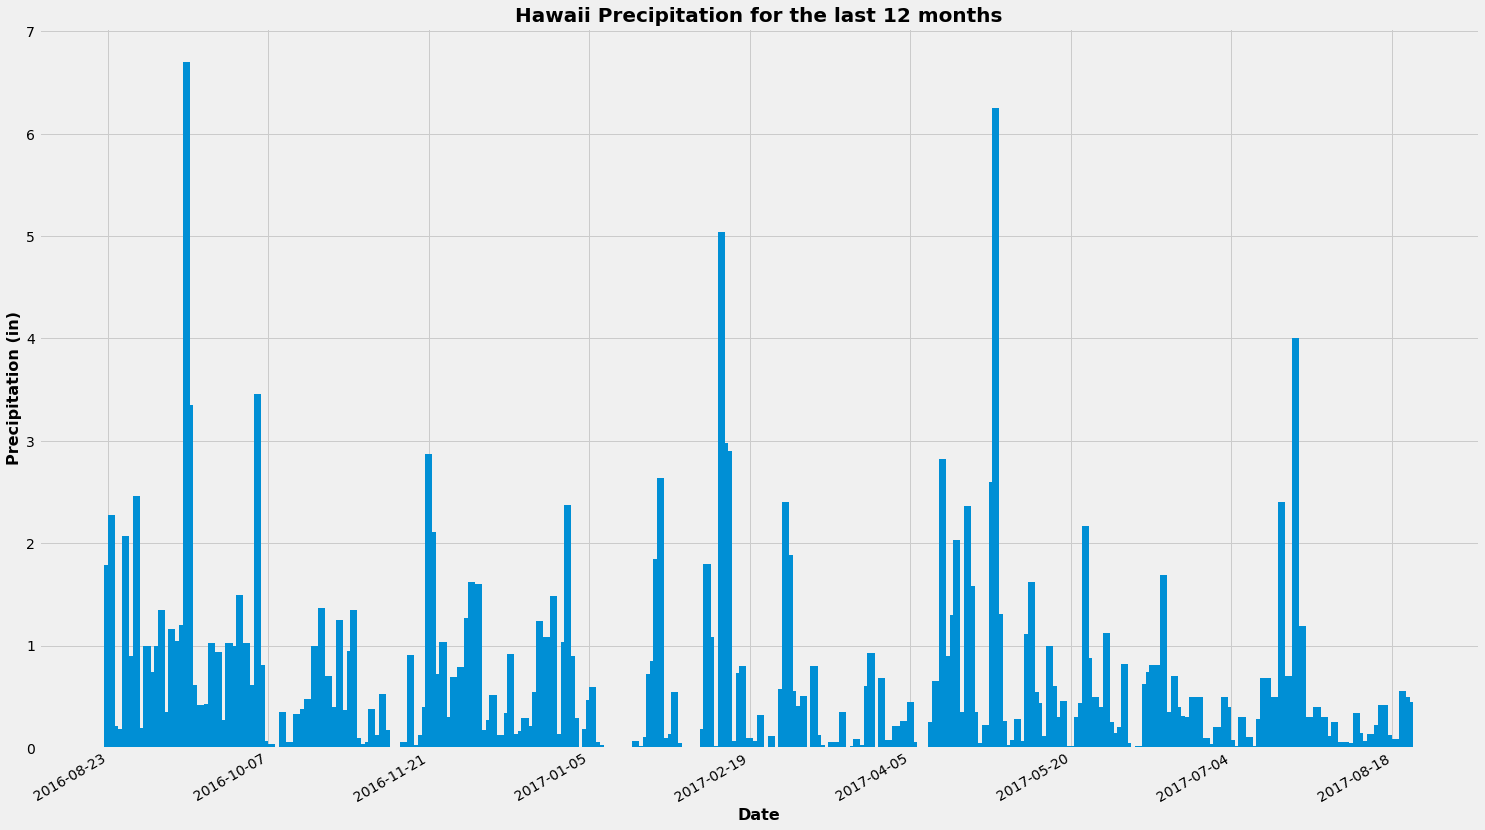

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_precip_df = pd.DataFrame(last_year_precip)
last_year_precip_df.set_index('date', inplace=True) 

# Sort the dataframe by date
sorted_last_year_df =  last_year_precip_df.sort_values('date')                       
sorted_last_year_df

#bar plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

# Use Pandas Plotting with Matplotlib to plot the data
ax.bar(sorted_last_year_df.index.values, sorted_last_year_df['prcp'], width=2 )

# Tell matplotlib to interpret the x-axis values as dates
#ax.xaxis_date()

#xlabel
ax.set_xlabel(xlabel='Date', fontsize=16, fontweight='bold')
ax.set_ylabel(ylabel='Precipitation (in)', fontsize=16, fontweight='bold')
ax.set_title(label='Hawaii Precipitation for the last 12 months', fontsize=20, fontweight='bold')

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

myLocator = mticker.MultipleLocator(45)
ax.xaxis.set_major_locator(myLocator)

plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
#view the station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).group_by(Station.station).count()
station_count


9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
temps = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').\
                                        filter(Measurement.station == 'USC00519281').all()
temps

temps_df = pd.DataFrame(temps)
temps_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


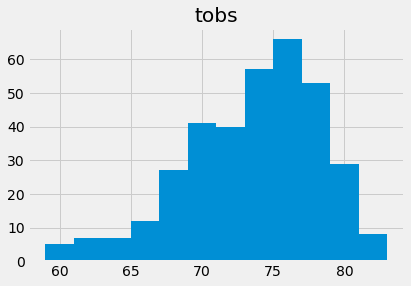

In [21]:
#histogram of last 12 months temperatures

#plt.hist(last_year_temps, bins=12)
#ax=plt.hist(last_year_temps, bins=12)
ax = temps_df.hist(column='tobs', bins=12)


## Bonus Challenge Assignment

In [22]:
#Temperature Analysis 1

#average June temperature

month_str = "06"

june = session.query(Measurement).\
    filter(func.strftime("%m", Measurement.date) == month_str)

#filter out possible null values
june_temp_list = []
for measurement in june:
    if type(measurement.tobs) == float:
       june_temp_list.append(measurement.tobs)


#average December temperature

month_str = "12"

december = session.query(Measurement).filter(func.strftime("%m", Measurement.date) == month_str)

#filter out possible null values
dec_temp_list = []
for measurement in december:
    if type(measurement.tobs) == float:
       dec_temp_list.append(measurement.tobs)
    
#get average temp values for June and December
print(mean(june_temp_list))
print(mean(dec_temp_list))


#t-test comparing June and December temperature averages
stats.ttest_ind(june_temp_list, dec_temp_list)


74.94411764705882
71.04152933421226


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [23]:
#Temperature Analysis 2

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-01', '2017-08-23'))


[(58.0, 74.14387974230493, 87.0)]


In [24]:
start = "2016-11-10"
end = "2016-11-15"

se_temp_results = session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(func.strftime("%Y-%m-%d", Measurement.date) >= start).\
        filter(func.strftime("%Y-%m-%d", Measurement.date) <= end).\
        group_by(Measurement.date).all()

se_temp_results

[('2016-11-10', 67.0, 75.0, 70.83333333333333),
 ('2016-11-11', 67.0, 77.0, 72.83333333333333),
 ('2016-11-12', 68.0, 79.0, 73.83333333333333),
 ('2016-11-13', 72.0, 79.0, 75.0),
 ('2016-11-14', 74.0, 79.0, 77.0),
 ('2016-11-15', 72.0, 78.0, 76.28571428571429)]

In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2017-02-05', '2017-02-15')

print(trip_temps)

# Convert list of tuples into normal list
unraveled_temps = all_names = list(np.ravel(trip_temps))

print(unraveled_temps)

#unpack list of tuples into variables
min_temp, avg_temp, max_temp = unraveled_temps

print(avg_temp)


[(59.0, 70.6986301369863, 80.0)]
[59.0, 70.6986301369863, 80.0]
70.6986301369863


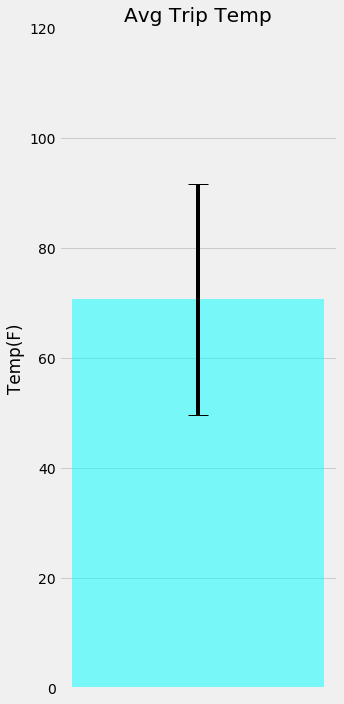

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_pos = np.arange(1)

# Build the plot
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(x_pos, avg_temp, yerr=max_temp-min_temp, align='center', alpha=0.5, ecolor='black', capsize=10, color='aqua')
ax.set_ylabel('Temp(F)')
ax.set_xticks(x_pos +1)
ax.set_title('Avg Trip Temp')
plt.ylim(0, 120)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()


In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#session.query(Measurement.station, func.sum(Measurement.prcp)).\
#    filter(Measurement.date >= '2017-02-15').filter(Measurement.date <= '2017-02-25').\
#    group_by(Measurement.station).\
#    order_by(func.sum(Measurement.prcp).desc()).all()

#columns to select
sel = [Station.station, Station.name, Station.latitude, Station.latitude, Station.elevation, func.sum(Measurement.prcp)]

#query
precip_by_station = session.query(*sel).filter(Measurement.station == Station.station).\
                                        group_by(Measurement.station).\
                                        order_by(func.sum(Measurement.prcp).desc()).all()

precip_by_station



[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  21.3331,
  152.4,
  1068.0899999999997),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  21.45167,
  32.9,
  588.6400000000001),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  21.4234,
  14.6,
  382.6199999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  21.33556,
  19.5,
  295.6800000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  21.5213,
  7.0,
  234.49000000000007),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  21.2716,
  3.0,
  131.61999999999992),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  21.3152,
  0.9,
  92.67999999999995),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  21.4992,
  306.6,
  70.86999999999999),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  21.3934,
  11.9,
  43.43999999999998)]

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = "2017-02-05"
end_date = "2017-02-15"

#initialize lists
trip_date_list = []
trip_m_d = []

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
start = dt.datetime.strptime(start_date, '%Y-%m-%d')
end = dt.datetime.strptime(end_date, '%Y-%m-%d')
step = dt.timedelta(days=1)
while start <= end:
    print(start.date())
    trip_date_list.append(start.date().strftime('%Y-%m-%d'))
    trip_m_d.append(start.date().strftime('%m-%d'))
    start += step

#print lists to test code
print(trip_date_list)
print(trip_m_d)


2017-02-05
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10
2017-02-11
2017-02-12
2017-02-13
2017-02-14
2017-02-15
['2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15']
['02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15']


In [30]:
#create day normals list
day_normals = []
day_mins = []
day_avgs = []
day_maxs = []

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in trip_m_d:
    day_normals.append(daily_normals(date))
    
# Convert list of tuples into normal list
unraveled_normals = all_names = list(np.ravel(day_normals))

print(unraveled_normals)

day_mins = unraveled_normals[0::3]
day_avgs = unraveled_normals[1::3]
day_maxs = unraveled_normals[2::3]

print(day_mins)
print(day_avgs)
print(day_maxs)

[59.0, 69.6842105263158, 80.0, 58.0, 70.38983050847457, 77.0, 60.0, 69.0, 77.0, 56.0, 66.75438596491227, 74.0, 57.0, 67.58928571428571, 75.0, 56.0, 68.41666666666667, 76.0, 61.0, 69.25, 79.0, 60.0, 69.15789473684211, 78.0, 58.0, 70.36206896551724, 80.0, 62.0, 70.89473684210526, 79.0, 56.0, 70.28813559322033, 79.0]
[59.0, 58.0, 60.0, 56.0, 57.0, 56.0, 61.0, 60.0, 58.0, 62.0, 56.0]
[69.6842105263158, 70.38983050847457, 69.0, 66.75438596491227, 67.58928571428571, 68.41666666666667, 69.25, 69.15789473684211, 70.36206896551724, 70.89473684210526, 70.28813559322033]
[80.0, 77.0, 77.0, 74.0, 75.0, 76.0, 79.0, 78.0, 80.0, 79.0, 79.0]


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Save the query results as a Pandas DataFrame and set the index to the date column

#create dictionary
trip_normals_dict = {'Date': trip_date_list,'Temp Min': day_mins,'Temp Avg': day_avgs,'Temp Max': day_maxs}

#confirm correct data in dictionary
print(trip_normals_dict)

#create temp normals df
trip_date_normals_df = pd.DataFrame(trip_normals_dict)

#set index to the date column
trip_date_normals_df.set_index('Date', inplace=True) 

trip_date_normals_df

#trip_date_temp_df = pd.merge(trip_date_list_df, trip_date_normals_df)

#trip_date_temp_df.head()

#trip_date_normals_df.set_index('date', inplace=True) 

{'Date': ['2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15'], 'Temp Min': [59.0, 58.0, 60.0, 56.0, 57.0, 56.0, 61.0, 60.0, 58.0, 62.0, 56.0], 'Temp Avg': [69.6842105263158, 70.38983050847457, 69.0, 66.75438596491227, 67.58928571428571, 68.41666666666667, 69.25, 69.15789473684211, 70.36206896551724, 70.89473684210526, 70.28813559322033], 'Temp Max': [80.0, 77.0, 77.0, 74.0, 75.0, 76.0, 79.0, 78.0, 80.0, 79.0, 79.0]}


,Temp Min,Temp Avg,Temp Max
Date,,,
2017-02-05,59.0,69.684211,80.0
2017-02-06,58.0,70.389831,77.0
2017-02-07,60.0,69.000000,77.0
2017-02-08,56.0,66.754386,74.0
2017-02-09,57.0,67.589286,75.0
2017-02-10,56.0,68.416667,76.0
2017-02-11,61.0,69.250000,79.0
2017-02-12,60.0,69.157895,78.0
2017-02-13,58.0,70.362069,80.0


[Text(0, 0, '2017-02-05'),
 Text(0, 0, '2017-02-06'),
 Text(0, 0, '2017-02-07'),
 Text(0, 0, '2017-02-08'),
 Text(0, 0, '2017-02-09'),
 Text(0, 0, '2017-02-10'),
 Text(0, 0, '2017-02-11'),
 Text(0, 0, '2017-02-12')]

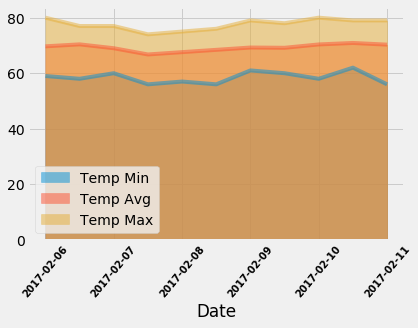

In [32]:
# Plot the daily normals as an area plot with `stacked=False`
ax = trip_date_normals_df.plot.area(stacked=False)

ax.set_xticklabels(labels = trip_date_normals_df.index, fontsize=10, fontweight='bold', rotation=50)
